In [92]:
from google.colab import drive
import pandas as pd
import zipfile
import os
!pip install tabulate
from tabulate import tabulate

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your zip file within Google Drive
LA_listing_path= '/content/drive/My Drive/CSV_USA/LAlistings.csv'
NYC_listing_path= '/content/drive/My Drive/CSV_USA/NYClistings.csv'
SF_listing_path= '/content/drive/My Drive/CSV_USA/SFlistings.csv'
Austin_listing_path= '/content/drive/My Drive/CSV_USA/austinlistings.csv'
Chicago_listing_path= '/content/drive/My Drive/CSV_USA/Chicagolistings.csv'


# Read the CSV files into DataFrames
df_LA_listings = pd.read_csv(LA_listing_path)
df_NYC_listings = pd.read_csv(NYC_listing_path)
df_SF_listings = pd.read_csv(SF_listing_path)
df_Austin_listings = pd.read_csv(Austin_listing_path)
df_Chicago_listings = pd.read_csv(Chicago_listing_path)

# Print the DataFrames
print(df_LA_listings)
print(df_NYC_listings)
print(df_SF_listings)
print(df_Austin_listings)
print(df_Chicago_listings)

df_total= pd.concat([df_LA_listings, df_NYC_listings, df_SF_listings, df_Austin_listings, df_Chicago_listings], ignore_index=True)
print(df_total)

df_total.to_csv('/content/drive/My Drive/CSV_USA/df_total.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                        id                                               name  \
0                 37014494      Spanish style lower duplex near Beverly Hills   
1      1024835174766068422                        Charming Beverly Hills Home   
2      1211025880050828732                       Modern Hollywood Hills house   
3       953950676345326970  Santa Monica apt, free parking, steps to the b...   
4                  5694422                             2 Bedroom Modern Oasis   
...                    ...                                                ...   
45528   847912022731044137                                 Torrance townhouse   
45529   944430003646575559                   DTLA Loft | Industrial | Central   
45530  1064680221580507438                      Private Guest Suite, Pets OK!   
45531  1187118117153911320         HF.B4 - Affordable Private

In [93]:
df_total= pd.read_csv('/content/drive/My Drive/CSV_USA/df_total.csv')
print(df_total)

                         id  \
0                  37014494   
1       1024835174766068422   
2       1211025880050828732   
3        953950676345326970   
4                   5694422   
...                     ...   
114072  1182687948699882888   
114073  1182716288044674640   
114074  1182824986028953093   
114075  1183388043392796826   
114076  1183396285495400449   

                                                     name    host_id  \
0           Spanish style lower duplex near Beverly Hills  278288178   
1                             Charming Beverly Hills Home  513813179   
2                            Modern Hollywood Hills house   68445028   
3       Santa Monica apt, free parking, steps to the b...  528669205   
4                                  2 Bedroom Modern Oasis    4151836   
...                                                   ...        ...   
114072                       Central spacious one bedroom   23612069   
114073                   Gorgeous 3 bedroom in Tri-

<ipython-input-93-1d2a5f962ec3>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total= pd.read_csv('/content/drive/My Drive/CSV_USA/df_total.csv')


**Clean data portion**

In [94]:
print(df_total.columns)

# Drop irrelevant columns
df_total.drop(columns=['neighbourhood_group','license'], inplace=True)

# Handle missing values
df_total.dropna(subset=['price'], inplace=True)  # Drop rows where price is missing
df_total['reviews_per_month'].fillna(0, inplace= True)

# Assume 0 reviews if missing

# Remove outliers in price using IQR
Q1 = df_total['price'].quantile(0.25)
Q3 = df_total['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_total = df_total[(df_total['price'] >= lower_bound) & (df_total['price'] <= upper_bound)]

# Cap number_of_reviews at the 99th percentile to reduce extreme outliers
review_cap = df_total['number_of_reviews'].quantile(0.99)
df_total['number_of_reviews'] = df_total['number_of_reviews'].clip(upper=review_cap)

# Standardize column formats if needed
df_total['price'] = df_total['price'].astype(float)
df_total['number_of_reviews'] = df_total['number_of_reviews'].astype(int)

# Verify cleaned data
df_total.info(), df_total.describe()


<ipython-input-94-1417ca90ebb0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_total['reviews_per_month'].fillna(0, inplace= True)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 77453 entries, 1 to 114076
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              77453 non-null  int64  
 1   name                            77453 non-null  object 
 2   host_id                         77453 non-null  int64  
 3   host_name                       77453 non-null  object 
 4   neighbourhood                   77453 non-null  object 
 5   latitude                        77453 non-null  float64
 6   longitude                       77453 non-null  float6

<ipython-input-94-1417ca90ebb0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['number_of_reviews'] = df_total['number_of_reviews'].clip(upper=review_cap)
<ipython-input-94-1417ca90ebb0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['price'] = df_total['price'].astype(float)
<ipython-input-94-1417ca90ebb0>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

(None,
                  id       host_id      latitude     longitude         price  \
 count  7.745300e+04  7.745300e+04  77453.000000  77453.000000  77453.000000   
 mean   5.509763e+17  2.003086e+08     36.362195   -101.103379    165.476625   
 std    4.862033e+17  1.931077e+08      3.903108     19.492300    102.372172   
 min    1.090000e+02  2.300000e+01     30.097450   -122.512110      5.000000   
 25%    3.994777e+07  2.490379e+07     34.006590   -118.358231     89.000000   
 50%    6.917874e+17  1.206489e+08     34.155949   -117.865222    140.000000   
 75%    1.004508e+18  3.896978e+08     40.708520    -73.998230    217.000000   
 max    1.244148e+18  6.513483e+08     42.022200    -73.713650    496.000000   
 
        minimum_nights  number_of_reviews  reviews_per_month  \
 count    77453.000000       77453.000000       77453.000000   
 mean        18.200367          42.836327           1.241735   
 std         24.324147          77.680930           1.874745   
 min          1

In [95]:
# Columns to keep
columns_to_keep = [
    'id','name', 'neighbourhood', 'latitude', 'longitude',
    'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365'
]

# Filter the DataFrame
df_total = df_total[columns_to_keep]

# Step 3: Handle missing values
# Fill missing values in 'reviews_per_month' with 0 (assumes no reviews if missing)
df_total['reviews_per_month'] = df_total['reviews_per_month'].fillna(0)

# Handle missing values in 'last_review' by replacing with 'Unknown'
df_total['last_review'] = df_total['last_review'].fillna('Unknown')

# Step 4: Convert data types where necessary
# Ensure 'price', 'minimum_nights', and 'availability_365' are numeric
df_total['price'] = pd.to_numeric(df_total['price'], errors='coerce')
df_total['minimum_nights'] = pd.to_numeric(df_total['minimum_nights'], errors='coerce')
df_total['availability_365'] = pd.to_numeric(df_total['availability_365'], errors='coerce')

# Step 5: Remove rows with invalid or missing critical data
df_total = df_total.dropna(subset=['price', 'minimum_nights', 'availability_365'])

# Step 6: Add derived columns for further analysis
# Add a flag for 'business' vs 'home' based on 'room_type'
df_total['is_business'] = df_total['room_type'].apply(lambda x: 1 if x in ['Entire home/apt'] else 0)

print(df_total)


<ipython-input-95-f5125507687b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['reviews_per_month'] = df_total['reviews_per_month'].fillna(0)
<ipython-input-95-f5125507687b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['last_review'] = df_total['last_review'].fillna('Unknown')
<ipython-input-95-f5125507687b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

                         id  \
1       1024835174766068422   
2       1211025880050828732   
3        953950676345326970   
4                   5694422   
5                  51254530   
...                     ...   
114072  1182687948699882888   
114073  1182716288044674640   
114074  1182824986028953093   
114075  1183388043392796826   
114076  1183396285495400449   

                                                     name    neighbourhood  \
1                             Charming Beverly Hills Home    Beverly Hills   
2                            Modern Hollywood Hills house    Beverly Hills   
3       Santa Monica apt, free parking, steps to the b...     Santa Monica   
4                                  2 Bedroom Modern Oasis          Del Rey   
5         Clean Fresh Cozy Private Room in West Hollywood   West Hollywood   
...                                                   ...              ...   
114072                       Central spacious one bedroom        Lake View   
114

In [96]:
# Fill missing values in 'latitude' and 'longitude' with 0
df_total['latitude'] = df_total['latitude'].fillna(0)
df_total['longitude'] = df_total['longitude'].fillna(0)

# Verify that no missing values remain in 'latitude' and 'longitude'
print(df_total[['latitude', 'longitude']].isnull().sum())

latitude     0
longitude    0
dtype: int64


In [97]:
# prompt: calculate the and find the top 100 profit by multipying price times mininmum nights for austinlistings

# Calculate profit and find the top 100
df_Austin_listings['profit'] = df_Austin_listings['price'] * df_Austin_listings['minimum_nights']
top_100_profit_austin = df_Austin_listings.nlargest(100, 'profit')
top_100_profit_austin

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,profit
193,727593,Luxery Lakefront House w/City Views,3769789,Chris,NaN,78746,30.297270,-97.789200,Entire home/apt,5343.0,360,6,2014-04-28,0.04,2,363,0,NaN,1923480.0
630,4718108,Relaxed Midcentury Modern,11784413,Albert,NaN,78723,30.316330,-97.678560,Entire home/apt,5000.0,28,0,NaN,NaN,1,364,0,NaN,140000.0
13658,1140040929531752281,Chateau de Sparkle!\n6-15 mos\nJUN '24 - AUG '25,324165547,Marie,NaN,78737,30.178628,-97.992791,Entire home/apt,360.0,365,0,NaN,NaN,1,358,0,NaN,131400.0
14834,1214725441107106029,Home in Zilker,436281614,Edward Miles,NaN,78704,30.258472,-97.762343,Entire home/apt,950.0,90,0,NaN,NaN,1,173,0,NaN,85500.0
7401,567281208428241281,Above Austin Crown Jewel on Lake Austin,210733801,Above Vacation,NaN,78732,30.348179,-97.875842,Entire home/apt,38143.0,2,0,NaN,NaN,34,310,0,NaN,76286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,39177459,One Story Morning Glory,15717481,DeAnn,NaN,78745,30.220950,-97.798450,Entire home/apt,500.0,30,2,2020-08-03,0.03,1,358,0,NaN,15000.0
8728,710112287121812876,Immaculate Home with Private Backyard Oasis,478426880,Dusty,NaN,78757,30.337350,-97.745830,Entire home/apt,500.0,30,3,2023-04-01,0.14,1,216,0,NaN,15000.0
10757,894949897647353482,Austin City View,15282426,Amanda,NaN,78704,30.258700,-97.773710,Entire home/apt,200.0,75,0,NaN,NaN,1,364,0,NaN,15000.0
15179,1243664265204920413,*Brand New* Luxury ATX Compound,50572577,Tyler,NaN,78704,30.260660,-97.778312,Entire home/apt,3000.0,5,0,NaN,NaN,2,327,0,NaN,15000.0


In [98]:

# Assuming 'df_total' is your cleaned DataFrame from the previous code

# Define a threshold for 'number_of_reviews' and 'reviews_per_month'
review_threshold = 300  # Example threshold, adjust as needed
reviews_per_month_threshold = 1 # Example threshold, adjust as needed

# Filter for best-rated listings
best_rated_reviews = df_total[
    (df_total['number_of_reviews'] >= review_threshold) &
    (df_total['reviews_per_month'] >= reviews_per_month_threshold)
]

# Display or further process the best_rated_reviews DataFrame
print(best_rated_reviews)

# Example: Find the top 10 best-rated listings based on price
top_10_best_rated = best_rated_reviews.nlargest(10, 'price')
top_10_best_rated

                         id                                            name  \
4                   5694422                          2 Bedroom Modern Oasis   
152                20173155                 Private Silver Lake Guest Suite   
228                 1109439               Bright Updated Venice Beach House   
279                 4424041           Master bedroom with attached bathroom   
579                 6578811                 LA Home 15mins fr LAX (Airport)   
...                     ...                                             ...   
109559   562327612648780713    Sonder South Wabash | Superior 1BR Apartment   
109562   562400001188770880  Sonder South Wabash | Studio w/ Courtyard View   
109563   562446127031517265    Sonder The Plymouth | Superior 3BR Apartment   
109579   565270654000261585     Sonder The Plymouth | Two-Bedroom Apartment   
112624  1013756559102152060      Iconic Journey | Navy Pier. Fitness Center   

          neighbourhood  latitude  longitude       

,id,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,is_business
106646,14296844,Spacious Old Town Loft in a Great Location.,Lincoln Park,41.911630,-87.640010,Entire home/apt,496.0,32,339,2023-07-30,3.59,1,307,1
91538,4931574,"Central Home with Pool, Putting Green, Game Room",78741,30.224980,-97.692970,Entire home/apt,492.0,1,360,2024-08-18,3.12,3,249,1
76487,21230082,ALL new modern apartment of 2 bedroom NYC styl...,Upper East Side,40.761780,-73.965730,Entire home/apt,483.0,2,406,2024-08-27,4.92,1,101,1
20941,35872969,MCM Malibu Private Studio Amazing Ocean Views,Malibu,34.040840,-118.644800,Entire home/apt,478.0,3,342,2024-09-03,5.43,33,341,1
107747,36211517,"Staypineapple Chicago, Deluxe King",Loop,41.883090,-87.628320,Private room,477.0,1,422,2024-05-26,7.67,10,352,0
94810,29965151,Stay on 6th Street | Walk Downtown,78702,30.265310,-97.732130,Entire home/apt,464.0,1,429,2024-09-11,7.95,17,317,1
19971,4205112,"Malibu, Carbon Beach - Suite Eight",Malibu,34.037500,-118.675730,Entire home/apt,460.0,2,429,2024-09-02,4.03,9,105,1
91038,319759,Swanky Townhome+Rooftop | Downtown | 6th Street!,78702,30.265677,-97.733294,Entire home/apt,460.0,1,346,2024-08-21,2.27,16,307,1
13709,3440825,Malibu Modern 1 bedroom Pool House,Unincorporated Santa Monica Mountains,34.050076,-118.649422,Entire home/apt,454.0,2,429,2024-09-01,5.21,1,149,1
53300,7951281,Beautiful 2BR heart of Fort Greene,Fort Greene,40.688990,-73.972690,Entire home/apt,450.0,30,319,2023-10-26,2.93,2,322,1


above is the most amount of reviews given, after finding top 5 properities in each we can use these?? idk

In [99]:
# prompt: calculate the and find the top 5 highest revenue per city b

# Calculate revenue
df_total['revenue'] = df_total['price'] * df_total['minimum_nights']

# Group by city and sum revenue
revenue_by_city = df_total.groupby('neighbourhood')['revenue'].sum()

# Get the top 5 cities by revenue
top_5_cities = revenue_by_city.nlargest(5)

top_5_cities

,revenue
neighbourhood,
Bedford-Stuyvesant,5317776.0
Venice,5299272.0
Upper East Side,5226189.0
Midtown,5168517.0
Hollywood,4301573.0


In [100]:
# prompt: calculate and find the top 5 highest profit by multipying price times mininmum nights

# Calculate profit and find the top 5 highest
df_total['profit'] = df_total['price'] * df_total['minimum_nights']
top_5_profit = df_total.nlargest(5, 'profit')

print(tabulate(top_5_profit, headers='keys', tablefmt='psql'))

+-------+---------------------+----------------------------------------------------+------------------+------------+-------------+-----------------+---------+------------------+---------------------+---------------+---------------------+----------------------------------+--------------------+---------------+-----------+----------+
|       |                  id | name                                               | neighbourhood    |   latitude |   longitude | room_type       |   price |   minimum_nights |   number_of_reviews | last_review   |   reviews_per_month |   calculated_host_listings_count |   availability_365 |   is_business |   revenue |   profit |
|-------+---------------------+----------------------------------------------------+------------------+------------+-------------+-----------------+---------+------------------+---------------------+---------------+---------------------+----------------------------------+--------------------+---------------+-----------+----------|
|

#best host per city

In [105]:
import pandas as pd

def best_hosts_analysis(df):
    # Group by host and city (neighbourhood_group)
    host_data = df.groupby(['id', 'neighbourhood']).agg(
        total_reviews=('number_of_reviews', 'sum'),
        avg_reviews_per_month=('reviews_per_month', 'mean'),
        total_listings=('calculated_host_listings_count', 'sum'),
        avg_price=('price', 'mean'),
        total_availability=('availability_365', 'sum')
    ).reset_index()

    # Add a combined score for ranking (optional, based on weighted metrics)
    # Example: Weight total reviews (50%), average reviews per month (30%), and total listings (20%)
    host_data['score'] = (
        0.5 * host_data['total_reviews'] +
        0.3 * host_data['avg_reviews_per_month'] +
        0.2 * host_data['total_listings']
    )

    # Rank hosts within each city based on the score
    host_data['rank'] = host_data.groupby('neighbourhood')['score'].rank(ascending=False)

    return host_data

# Analyze the best hosts
best_hosts = best_hosts_analysis(df_total)

# Display the top 5 hosts per city
top_hosts_per_city = best_hosts[best_hosts['rank'] <= 5]

# Display the results
print("Top 5 Hosts Per City Analysis:")
print(top_hosts_per_city)

Top 5 Hosts Per City Analysis:
                        id         neighbourhood  total_reviews  \
13                    7097           Fort Greene            383   
16                    7992       Atwater Village            293   
17                    8021        Pico-Robertson            239   
33                   12937      Long Island City            414   
44                   16580          East Village            429   
...                    ...                   ...            ...   
75039  1214478558280402548              Gramercy              0   
75040  1214478928294155994              Gramercy              0   
75041  1214479406267736723              Gramercy              0   
75940  1223095953748925297  Chatsworth Reservoir              0   
76580  1230413477536936223           Castle Hill              0   

       avg_reviews_per_month  total_listings  avg_price  total_availability  \
13                      2.15               2      205.0                 244   
16    

*Filtering dating fo reviews*

In [ ]:
df_filtered = df_total[df_total["id"] == 10992778]

# BEGIN EDAS

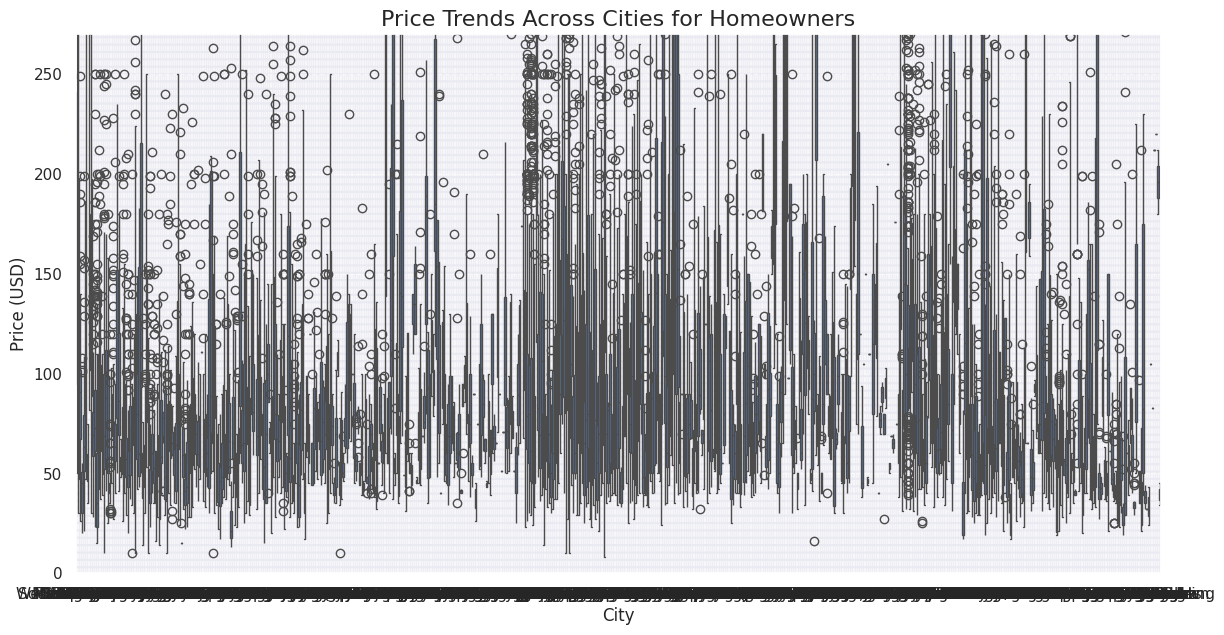

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for better aesthetics
sns.set()

# Price Trends Across Cities for Homeowners
def visualize_homeowner_price_trends(df):
    # Filter for homeowners (is_business == 0)
    homeowner_df = df[df['is_business'] == 0]

    plt.figure(figsize=(14, 7))
    sns.boxplot(data=homeowner_df, x='neighbourhood', y='price')
    plt.title("Price Trends Across Cities for Homeowners", fontsize=16)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.ylim(0, homeowner_df['price'].quantile(0.95))  # Focus on 95% of the data, removing extreme outliers
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Call the function to generate the visualization
visualize_homeowner_price_trends(df_total)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Profitability Trends (e.g., revenue trends, outliers)
def visualize_profitability_trends(df):
    # Assuming `availability_365` represents maximum possible revenue if always rented
    df['potential_revenue'] = df['price'] * df['availability_365']

    plt.figure(figsize=(14, 7))
    sns.boxplot(data=df, x='neighbourhood', y='potential_revenue', hue='room_type')
    plt.title("Profitability Trends (Potential Revenue by City and Room Type)", fontsize=16)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Potential Revenue (USD)", fontsize=12)
    plt.ylim(0, df['potential_revenue'].quantile(0.95))  # Focus on 95% of the data, removing extreme outliers
    plt.legend(title="Room Type")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Revenue Outliers
def visualize_revenue_outliers(df):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=df, x='availability_365', y='price', hue='neighbourhood', alpha=0.6)
    plt.title("Revenue Outliers: Price vs Availability", fontsize=16)
    plt.xlabel("Availability (days per year)", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.legend(title="City")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Call the functions to generate visualizations
visualize_profitability_trends(df_total)
visualize_revenue_outliers(df_total)


#GEOGRAPHIC EDAS

In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display, HTML

# Function to generate a geographic price trend heatmap
def generate_price_heatmap(df, title="Geographic Price Trends"):
    # Initialize the map at the average latitude and longitude
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=5)

    # Prepare data for the heatmap (latitude, longitude, price)
    heat_data = df[['latitude', 'longitude', 'price']].dropna()
    heat_data = heat_data.values.tolist()  # Convert to list for folium

    # Add a heatmap layer
    HeatMap(heat_data, radius=10, blur=15).add_to(m)

    return m

# Generate the heatmap
price_heatmap = generate_price_heatmap(df_total)

# Display the map
price_heatmap

interactive heatmap to see the hotspot cities for people who are not familiar with the US

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by neighborhood
neighborhood_data = df_total.groupby('neighbourhood').agg(
    avg_price=('price', 'mean'),
    total_listings=('name', 'count'),
    avg_reviews_per_month=('reviews_per_month', 'mean')
).reset_index()

# Sort neighborhoods by average price
neighborhood_data = neighborhood_data.sort_values(by='avg_price', ascending=False)

# Bar plot of average price by neighborhood
plt.figure(figsize=(14, 7))
sns.barplot(data=neighborhood_data.head(10), x='avg_price', y='neighbourhood', palette='viridis')
plt.title("Top 10 Neighborhoods by Average Price", fontsize=16)
plt.xlabel("Average Price (USD)", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# HEATMAP FOR DENSITY

# Function to create a geographic heatmap
def generate_heatmap(df_total, NYC):
    # Filter data for the selected city
    city_data = df_total[df_total['neighbourhood'] == NYC]

    # Handle missing values in latitude and longitude before calculating the mean
    city_data = city_data.dropna(subset=['latitude', 'longitude', 'price'])  # Drop rows with NaNs in lat/long and price

    # Initialize the map at the city's central point
    map_center = [city_data['latitude'].mean(), city_data['longitude'].mean()]
    m = folium.Map(location= map_center, zoom_start=11)

    # Add a heatmap layer
    heat_data = city_data[['latitude', 'longitude', 'price']].values.tolist()  # No need to dropna again
    HeatMap(heat_data, radius=10, blur=15).add_to(m)

    return m

# Generate the heatmap for NYC
nyc_heatmap = generate_heatmap(df_total, "NYC")
nyc_heatmap

#REVIEW BASED EDAS

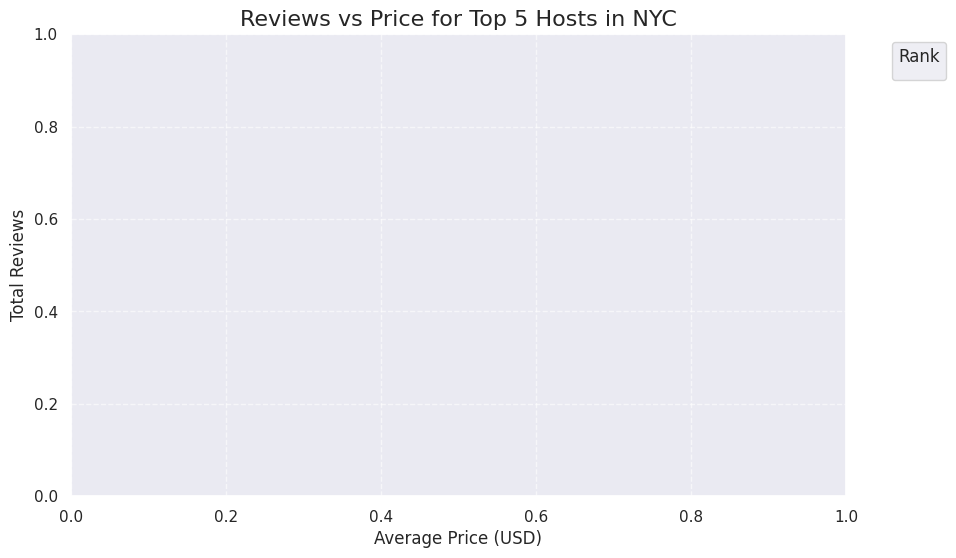

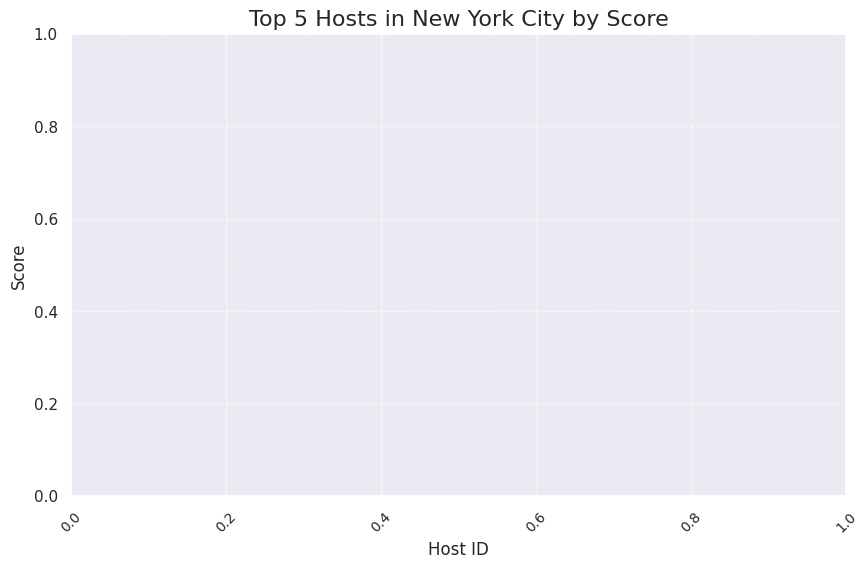

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_nyc_host_rankings(top_hosts):
    # Filter for NYC data and top 5 hosts
    nyc_data = top_hosts[(top_hosts['neighbourhood'] == 'NYC') & (top_hosts['rank'] <= 5)]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=nyc_data, x='id', y='score', palette='viridis')
    plt.title("Top 5 Hosts in New York City by Score", fontsize=16)
    plt.xlabel("Host ID", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Visualize the rankings for NYC
visualize_nyc_host_rankings(top_hosts_per_city)